In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("abalone_original.csv")

In [3]:
data

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [4]:
data['sex']=pd.get_dummies(data['sex'],drop_first=True)

In [5]:
data

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,0,91,73,19,102.8,44.9,20.2,30.0,15
1,0,70,53,18,45.1,19.9,9.7,14.0,7
2,0,106,84,27,135.4,51.3,28.3,42.0,9
3,0,88,73,25,103.2,43.1,22.8,31.0,10
4,1,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,0,113,90,33,177.4,74.0,47.8,49.8,11
4173,0,118,88,27,193.2,87.8,42.9,52.1,10
4174,0,120,95,41,235.2,105.1,57.5,61.6,9
4175,0,125,97,30,218.9,106.2,52.2,59.2,10


In [6]:
x=data.iloc[:,0:8]
y=data['rings']

In [7]:
x

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
0,0,91,73,19,102.8,44.9,20.2,30.0
1,0,70,53,18,45.1,19.9,9.7,14.0
2,0,106,84,27,135.4,51.3,28.3,42.0
3,0,88,73,25,103.2,43.1,22.8,31.0
4,1,66,51,16,41.0,17.9,7.9,11.0
...,...,...,...,...,...,...,...,...
4172,0,113,90,33,177.4,74.0,47.8,49.8
4173,0,118,88,27,193.2,87.8,42.9,52.1
4174,0,120,95,41,235.2,105.1,57.5,61.6
4175,0,125,97,30,218.9,106.2,52.2,59.2


In [8]:
y[4175]

10

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
y_test

668     13
1580     8
3784    11
463      5
2615    12
        ..
575     11
3231    12
1084     7
290     17
2713     4
Name: rings, Length: 836, dtype: int64

In [11]:
y_train

3141     5
3521     3
883     15
3627    10
2106    14
        ..
1033    10
3264    12
1653    10
2607     9
2732     8
Name: rings, Length: 3341, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Now we have to convert my data into tensors with Float data type

In [13]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

In [14]:
X_train=torch.FloatTensor(np.asarray(X_train))
X_test=torch.FloatTensor(np.asarray(X_test))

In [15]:
X_train[0]

tensor([ 1.4761, -2.8886, -2.7757, -1.4109, -1.6309, -1.5576, -1.5894, -1.6550])

In [16]:
y_train=torch.tensor(np.asarray(y_train))
y_test=torch.tensor(np.asarray(y_test))

In [17]:
y_train[0]

tensor(5)

In [18]:
y_test

tensor([13,  8, 11,  5, 12, 11,  7,  8,  7,  9,  8,  8, 11,  9,  4,  7,  7, 17,
         7,  7,  7,  5,  8,  9, 10, 10,  5, 15, 10, 14,  8,  4,  9, 13,  7,  7,
         8,  9,  8, 11, 15, 12, 17, 16, 11, 11,  8, 10, 11,  6, 13,  7, 13, 20,
        12,  7,  8, 10,  7,  7,  9,  9, 11,  8,  7, 12, 13, 17,  8, 12,  9, 17,
        10,  6, 11,  8,  8,  9,  8,  8,  8,  6,  7, 13, 11,  6,  9, 12,  5,  6,
        11, 11,  8,  7, 16,  8, 11,  8, 18, 11, 12, 14, 12, 11,  6,  9,  7,  6,
        11, 11, 11, 12, 20, 10, 14, 10, 10, 12,  4, 12,  7, 13,  6,  8, 17, 15,
         9, 11,  7, 11,  8,  7,  7, 10, 11,  9, 10,  9,  8, 16, 16, 13,  6,  9,
        10,  9,  8,  8,  8,  5,  8, 11,  5,  9,  9,  6,  8,  7, 10, 11, 12,  8,
         9, 10,  5, 16,  7,  6, 15,  9, 10,  3,  6, 10, 11, 12,  5,  8,  5, 13,
         9, 11,  7,  9, 15,  8, 10,  8,  5,  9, 19,  9,  8,  9, 11,  9,  9,  9,
         5, 15, 10, 14, 12,  8, 12, 11,  5, 10, 11, 23,  4, 11, 11, 10,  9,  9,
         9,  8,  5, 13, 12, 14,  8, 11, 

In [19]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(8,15)
        self.fc2 = torch.nn.Linear(15,11)
        self.fc3= torch.nn.Linear(11,12)
        self.output=torch.nn.Linear(12,1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x= F.relu(self.fc3(x))
        x=self.output(x)
        return x

In [20]:
Neural_Network=ANN()

In [21]:
loss_function=nn.L1Loss()
optimizer=torch.optim.Adam(Neural_Network.parameters(),lr=0.01)

In [22]:
list_of_loss=[]

In [23]:
for i in range(0,450):
    y_pred=Neural_Network.forward(X_train)
    loss=loss_function(y_pred,y_train)
    list_of_loss.append(loss)
    print("{} Epoc  {} loss".format(i,loss.item()))
    optimizer.zero_grad()  ## Initially our derivative will be 0
    loss.backward()        ## Do the first propagation
    optimizer.step()        ## Performs a single optimization step

c:\users\harsh\anaconda3\envs\pytorch2\lib\site-packages\torch\nn\modules\loss.py:94: UserWarning: Using a target size (torch.Size([3341])) that is different to the input size (torch.Size([3341, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


0 Epoc  9.85359001159668 loss
1 Epoc  9.765630722045898 loss
2 Epoc  9.666389465332031 loss
3 Epoc  9.551810264587402 loss
4 Epoc  9.4102783203125 loss
5 Epoc  9.231095314025879 loss
6 Epoc  9.004941940307617 loss
7 Epoc  8.72374153137207 loss
8 Epoc  8.376784324645996 loss
9 Epoc  7.951601982116699 loss
10 Epoc  7.435754776000977 loss
11 Epoc  6.82506799697876 loss
12 Epoc  6.133891582489014 loss
13 Epoc  5.412964820861816 loss
14 Epoc  4.771329402923584 loss
15 Epoc  4.365148067474365 loss
16 Epoc  4.309399604797363 loss
17 Epoc  4.54079532623291 loss
18 Epoc  4.822929859161377 loss
19 Epoc  4.958381175994873 loss
20 Epoc  4.896511077880859 loss
21 Epoc  4.679118633270264 loss
22 Epoc  4.383902549743652 loss
23 Epoc  4.086001396179199 loss
24 Epoc  3.8452155590057373 loss
25 Epoc  3.692563533782959 loss
26 Epoc  3.624347686767578 loss
27 Epoc  3.6111199855804443 loss
28 Epoc  3.615459680557251 loss
29 Epoc  3.6019201278686523 loss
30 Epoc  3.549747943878174 loss
31 Epoc  3.4530701637

250 Epoc  2.3381149768829346 loss
251 Epoc  2.338101387023926 loss
252 Epoc  2.338087797164917 loss
253 Epoc  2.338074207305908 loss
254 Epoc  2.3380610942840576 loss
255 Epoc  2.338047981262207 loss
256 Epoc  2.3380351066589355 loss
257 Epoc  2.338021755218506 loss
258 Epoc  2.3380093574523926 loss
259 Epoc  2.3379969596862793 loss
260 Epoc  2.337984561920166 loss
261 Epoc  2.3379719257354736 loss
262 Epoc  2.3379595279693604 loss
263 Epoc  2.337946891784668 loss
264 Epoc  2.3379344940185547 loss
265 Epoc  2.3379218578338623 loss
266 Epoc  2.337909460067749 loss
267 Epoc  2.3378965854644775 loss
268 Epoc  2.337883949279785 loss
269 Epoc  2.3378713130950928 loss
270 Epoc  2.3378584384918213 loss
271 Epoc  2.3378472328186035 loss
272 Epoc  2.337836265563965 loss
273 Epoc  2.337825298309326 loss
274 Epoc  2.3378143310546875 loss
275 Epoc  2.337803602218628 loss
276 Epoc  2.337792158126831 loss
277 Epoc  2.3377814292907715 loss
278 Epoc  2.337770462036133 loss
279 Epoc  2.3377597332000732

In [32]:
import matplotlib.pyplot as plt

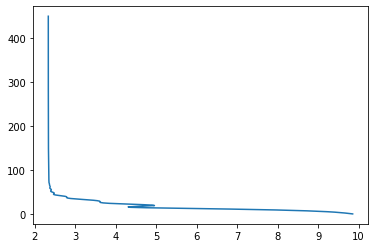

In [33]:
plt.plot(list_of_loss,range(0,450))

In [34]:
# torch.no_grad() tells PyTorch that we do not want to perform back-propagation,

In [35]:
torch.save(Neural_Network,"first_model.pt")

In [36]:
torch.load("first_model.pt")

ANN(
  (fc1): Linear(in_features=8, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=11, bias=True)
  (fc3): Linear(in_features=11, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=1, bias=True)
)

In [37]:
point1=sc.transform([[0,125,97,30,218.9,106.2,52.2,59.]])

In [38]:
point2=torch.FloatTensor(point1)

In [39]:
with torch.no_grad():
    print(Neural_Network(point2))

tensor([[9.9712]])
